In [1]:
import os
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
import cv2
import glob
import tifffile as tiff
import matplotlib.pyplot as plt

In [2]:
image_list = []
code = []

for filename in glob.glob('R_MCA/*.tiff'):
    img = tiff.imread(filename)
    image_list.append(img)
    code.append(os.path.basename(filename).split('.tiff')[0])
    print(filename)
    

R_MCA\ADM001_Tmap_T15_R_MCA.tiff
R_MCA\ADM004_Tmap_T15_R_MCA.tiff
R_MCA\CTA002_Tmap_T15_R_MCA.tiff
R_MCA\CTA003_Tmap_T15_R_MCA.tiff
R_MCA\CTA004_Tmap_T15_R_MCA.tiff
R_MCA\ESP001_Tmap_T15_R_MCA.tiff
R_MCA\ESP002_Tmap_T15_R_MCA.tiff
R_MCA\ESP003_Tmap_T15_R_MCA.tiff
R_MCA\ESP006_Tmap_T15_R_MCA.tiff
R_MCA\ESP008_Tmap_T15_R_MCA.tiff
R_MCA\ESP009_Tmap_T15_R_MCA.tiff
R_MCA\ESP010_Tmap_T15_R_MCA.tiff
R_MCA\ESP011_Tmap_T15_R_MCA.tiff
R_MCA\EST004_Tmap_T15_R_MCA.tiff
R_MCA\EXT003_Tmap_T15_R_MCA.tiff
R_MCA\MED001_Tmap_T15_R_MCA.tiff
R_MCA\MED002_Tmap_T15_R_MCA.tiff
R_MCA\MED006_Tmap_T15_R_MCA.tiff
R_MCA\NRT001_Tmap_T15_R_MCA.tiff
R_MCA\NRT002_Tmap_T15_R_MCA.tiff
R_MCA\NRT003_Tmap_T15_R_MCA.tiff
R_MCA\NRT004_Tmap_T15_R_MCA.tiff


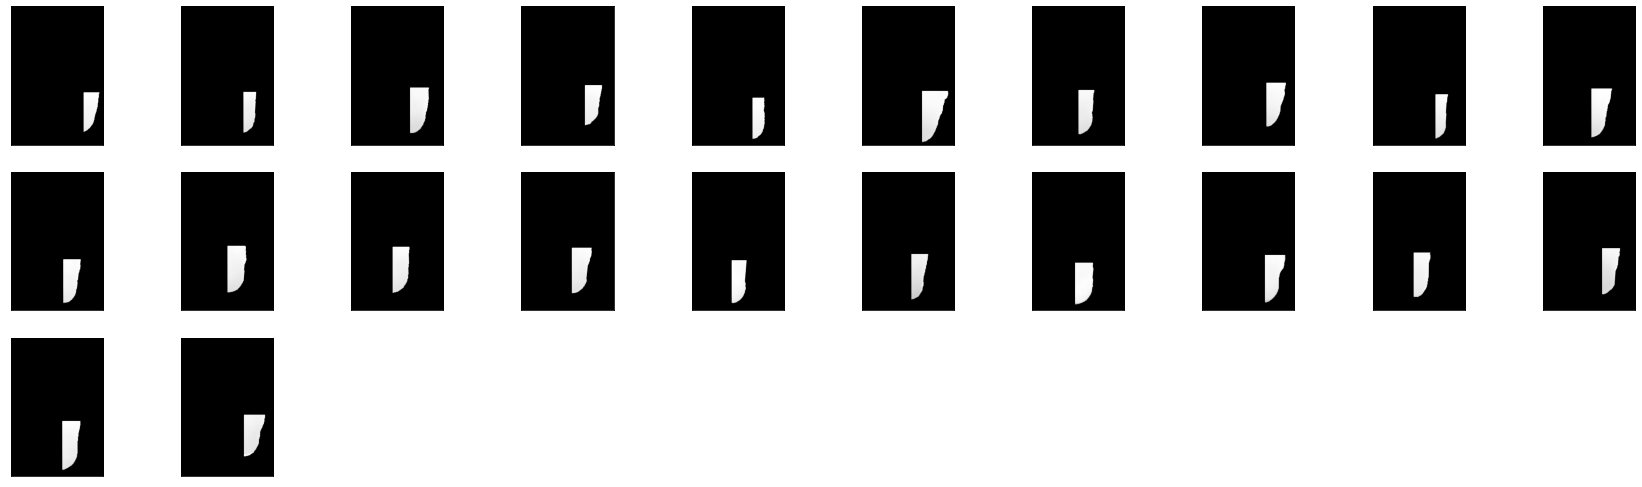

In [3]:
# Plot image for checking purposes
# Specify the overall grid size
plt.figure(figsize=(30,30)) 

for i in range(len(image_list)):
    # The number of images in the grid is 22 distributed in a 10 by 10 matrix
    plt.subplot(10,10,i+1)    
    plt.imshow(image_list[i], cmap=plt.cm.Greys_r)
    plt.xticks([])
    plt.yticks([])
plt.show()

In [4]:
# Extract mean value for each angiosome on each image
# Define list in which data will be stored
R_MCA_mean = []
R_MCA_std = []
R_MCA_max = []
R_MCA_min = []
R_MCA_skew = []
R_MCA_kurtosis = []
R_MCA_img = []

subject = []

for i in range(len(image_list)):
    # Save image as array
    img = np.asarray(image_list[i][image_list[i] > 0])
    R_MCA_img.append(img)
    # Mean value
    img_mean = np.mean(image_list[i][image_list[i] > 0])   
    R_MCA_mean.append(img_mean)
    # Standard deviation 
    img_std = np.std(image_list[i][image_list[i] > 0])   
    R_MCA_std.append(img_std)
    # Maximum value
    img_max = np.max(image_list[i][image_list[i] > 0])   
    R_MCA_max.append(img_max)
    # Minimum value
    img_min = np.min(image_list[i][image_list[i] > 0])   
    R_MCA_min.append(img_min)
    # Skew
    img_skew = skew(image_list[i][image_list[i] > 0])   
    R_MCA_skew.append(img_skew)
    # Kurtosis
    img_kurtosis = kurtosis(image_list[i][image_list[i] > 0])   
    R_MCA_kurtosis.append(img_kurtosis)
    # Subject
    subject.append(code[i])
    print(subject[i], R_MCA_mean[i], R_MCA_std[i], R_MCA_max[i], R_MCA_min[i], R_MCA_skew[i], R_MCA_kurtosis[i])   


ADM001_Tmap_T15_R_MCA 26.27655 4.2549257 28.892746 0.12731895 -4.423097757271957 20.158549753861234
ADM004_Tmap_T15_R_MCA 19.15672 2.9364948 22.236345 0.065047905 -3.9983441072802948 18.93116958970971
CTA002_Tmap_T15_R_MCA 23.208954 3.3936543 26.787292 0.19930905 -3.91612669085253 19.763326528568104
CTA003_Tmap_T15_R_MCA 22.76317 3.4755538 25.361252 0.06921322 -4.123247755847331 18.03622096037997
CTA004_Tmap_T15_R_MCA 21.200613 3.3054194 23.377064 0.061923925 -4.305372593978064 20.28153619129111
ESP001_Tmap_T15_R_MCA 25.140362 3.5222745 28.29178 0.12107098 -3.9135324303586967 20.31366910978999
ESP002_Tmap_T15_R_MCA 24.426937 3.4977956 28.56623 0.11014873 -4.159288642766517 21.207435490879497
ESP003_Tmap_T15_R_MCA 26.559143 3.6846654 29.623873 0.20863482 -4.326666524586415 22.809672941612526
ESP006_Tmap_T15_R_MCA 23.601562 3.8693078 27.11994 0.12107098 -3.585901852456947 15.129642834770173
ESP008_Tmap_T15_R_MCA 24.4266 3.4985812 27.290257 0.08534211 -3.9272687101295944 19.90129111755625

In [5]:
# Initialize data of lists
data = {'Subject': subject,
        'R_MCA_mean': R_MCA_mean, 
        'R_MCA_std': R_MCA_std,
        'R_MCA_max': R_MCA_max,
        'R_MCA_min': R_MCA_min,
        'R_MCA_skew': R_MCA_skew,
        'R_MCA_kurtosis': R_MCA_kurtosis}
  
# Create DataFrame
df = pd.DataFrame(data)
display(df)

df.to_csv('R_MCA.csv', index=False) 

,Subject,R_MCA_mean,R_MCA_std,R_MCA_max,R_MCA_min,R_MCA_skew,R_MCA_kurtosis
0,ADM001_Tmap_T15_R_MCA,26.276550,4.254926,28.892746,0.127319,-4.423098,20.158550
1,ADM004_Tmap_T15_R_MCA,19.156719,2.936495,22.236345,0.065048,-3.998344,18.931170
2,CTA002_Tmap_T15_R_MCA,23.208954,3.393654,26.787292,0.199309,-3.916127,19.763327
3,CTA003_Tmap_T15_R_MCA,22.763170,3.475554,25.361252,0.069213,-4.123248,18.036221
4,CTA004_Tmap_T15_R_MCA,21.200613,3.305419,23.377064,0.061924,-4.305373,20.281536
5,ESP001_Tmap_T15_R_MCA,25.140362,3.522274,28.291780,0.121071,-3.913532,20.313669
6,ESP002_Tmap_T15_R_MCA,24.426937,3.497796,28.566231,0.110149,-4.159289,21.207435
7,ESP003_Tmap_T15_R_MCA,26.559143,3.684665,29.623873,0.208635,-4.326667,22.809673
8,ESP006_Tmap_T15_R_MCA,23.601562,3.869308,27.119940,0.121071,-3.585902,15.129643
9,ESP008_Tmap_T15_R_MCA,24.426600,3.498581,27.290257,0.085342,-3.927269,19.901291


In [6]:
# Total values for this angiosome
# Concatenate all data for extracting parameters
R_MCA_all = np.concatenate((R_MCA_img[0],R_MCA_img[1],R_MCA_img[2],R_MCA_img[3],R_MCA_img[4],R_MCA_img[5],
                            R_MCA_img[6],R_MCA_img[7],R_MCA_img[8],R_MCA_img[9],R_MCA_img[10],R_MCA_img[11],
                            R_MCA_img[12],R_MCA_img[13],R_MCA_img[14],R_MCA_img[15],R_MCA_img[16],R_MCA_img[17],
                            R_MCA_img[18],R_MCA_img[19],R_MCA_img[20],R_MCA_img[21]))
R_MCA_all_mean = np.mean(R_MCA_all)
R_MCA_all_std = np.std(R_MCA_all)
R_MCA_all_max = np.max(R_MCA_all)
R_MCA_all_min = np.min(R_MCA_all)
R_MCA_all_skew = skew(R_MCA_all)
R_MCA_all_kurtosis = kurtosis(R_MCA_all)


# Initialize data of lists
data2 = {'Variables':['R_MCA_all_mean', 'R_MCA_all_std', 'R_MCA_all_max', 'R_MCA_all_min', 'R_MCA_all_skew', 
                      'R_MCA_all_kurtosis'],
         'Values': [R_MCA_all_mean, R_MCA_all_std, R_MCA_all_max, R_MCA_all_min, R_MCA_all_skew, R_MCA_all_kurtosis]}
  
# Create DataFrame
df2 = pd.DataFrame(data2)
display(df2)

df2.to_csv('R_MCA_all.csv', index=False) 


,Variables,Values
0,R_MCA_all_mean,24.086775
1,R_MCA_all_std,4.082469
2,R_MCA_all_max,29.774635
3,R_MCA_all_min,0.041283
4,R_MCA_all_skew,-2.566584
5,R_MCA_all_kurtosis,10.317716


In [7]:
a_file = open("R_MCA.txt", "w")
np.savetxt(a_file, R_MCA_all)
a_file.close()